In [1]:
from astrosite_dataset import ClassificationAstrositeDataset, TrackingAstrositeDataset, SpectrogramDataset
from classification_network import LeNet5
import os

dataset_path = '../dataset/recordings'
assert os.path.isdir(dataset_path)

target_list = ['50574', '47851', '37951', '39533', '43751', '32711', '27831', '45465',
       '46826', '42942', '42741', '41471', '43873', '40982', '41725', '43874',
       '27711', '40892', '50005', '44637']

dataset = SpectrogramDataset(dataset_path, split=target_list)

net = LeNet5(len(target_list))

/home/jules/miniconda3/envs/satellite/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using  cpu


/home/jules/miniconda3/envs/satellite/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


torch.Size([1, 513, 223])
497


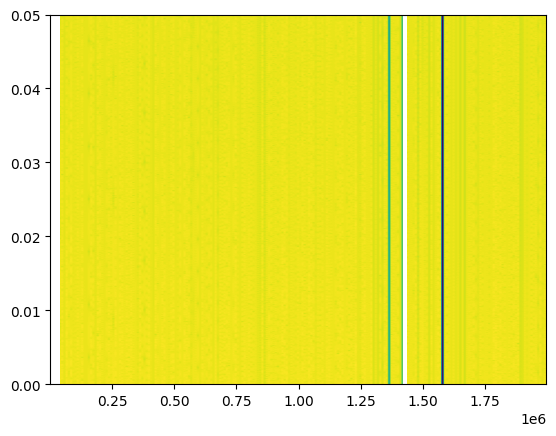

In [2]:
import torch


batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 10
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using ", device)
print(dataset[0][0].shape)
print(len(dataset))

train_loader = torch.utils.data.DataLoader(dataset = dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

torch.Size([2, 1, 513, 223])
torch.Size([2, 6, 127, 55])
torch.Size([2, 16, 31, 13])
torch.Size([2, 16, 403])
torch.Size([2, 16, 120])
tensor(2.7769, grad_fn=<NllLoss2DBackward0>)
torch.Size([2, 1, 513, 223])
torch.Size([2, 6, 127, 55])
torch.Size([2, 16, 31, 13])
torch.Size([2, 16, 403])
torch.Size([2, 16, 120])
tensor(2.7735, grad_fn=<NllLoss2DBackward0>)
torch.Size([2, 1, 513, 223])
torch.Size([2, 6, 127, 55])
torch.Size([2, 16, 31, 13])
torch.Size([2, 16, 403])
torch.Size([2, 16, 120])
tensor(2.7456, grad_fn=<NllLoss2DBackward0>)
torch.Size([2, 1, 513, 223])
torch.Size([2, 6, 127, 55])
torch.Size([2, 16, 31, 13])
torch.Size([2, 16, 403])
torch.Size([2, 16, 120])
tensor(2.7552, grad_fn=<NllLoss2DBackward0>)
torch.Size([2, 1, 513, 223])
torch.Size([2, 6, 127, 55])
torch.Size([2, 16, 31, 13])
torch.Size([2, 16, 403])
torch.Size([2, 16, 120])
tensor(2.6931, grad_fn=<NllLoss2DBackward0>)
torch.Size([2, 1, 513, 223])
torch.Size([2, 6, 127, 55])
torch.Size([2, 16, 31, 13])
torch.Size([2, 

KeyboardInterrupt: 

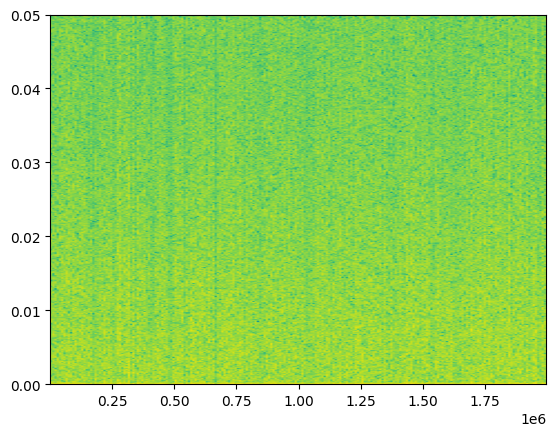

In [3]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = net(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

In [3]:
125*52

6500